{{ badge }}

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import getpass as gt

user = input('Provide Kaggle Username : ')
api = gt.getpass('API key for '+ user +' :')
print('')


!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

kaggle_api_key = {'username':user, 'key':api}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(kaggle_api_key, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d schirmerchad/bostonhoustingmlnd

from zipfile import ZipFile
import pandas as pd

with ZipFile('/content/bostonhoustingmlnd.zip','r') as z:
  hs_data = pd.read_csv(z.open('housing.csv'))

  0% 0.00/4.35k [00:00<?, ?B/s]
100% 4.35k/4.35k [00:00<00:00, 7.98MB/s]


In [ ]:
prices = hs_data['MEDV']
features = hs_data.drop(labels=['MEDV'], axis = 1)

print('Boston housing dataset has {} data points with {} variables each'.format(*hs_data.shape))

Boston housing dataset has 489 data points with 4 variables each


**<h2>Learning Curves**

* Learning Curve shows the relationship of the training score Vs cross validated test score with a varying number of training.
* These curve shows:
  * How much the estimator benefits from more data. (eg: do we have 'enough data')
  * If the estimator is more sensitive to 'error due to variance(test)' vs 'error due to bias(training)'.
* If the training and CV scores **converge**  together as more data is added (shown in first two figures), then model will **not benefit** from more data.(no further data is needed).
* If the training score is much greater than the validation score(shown in fig 3 & 4) then model needs more training examples in order to generalize more effectively.
* The curves are plotted with the mean scores, however variablity during CV shown with the shaded areas that represent a **standard deviation** above and below the mean for all cross-validations.
* If the model suffers from error due to **bias**, then there'll be more variability around the **training score curve**.
* If the model suffers from error due to **variance**, then there'll be more variability around the **cross validated score curve**.
* A cross validation generator splits the whole dataset K times in training and test data.(K-fold cv, below we used 10 fold)
* Subsets of training set with varying sizes will be used to train the estimator and a score for each training subset size and test set will be computed.
* Later, the scores will be averaged over all K runs for each training subset size.

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore", category = FutureWarning, module = 'sklearn')

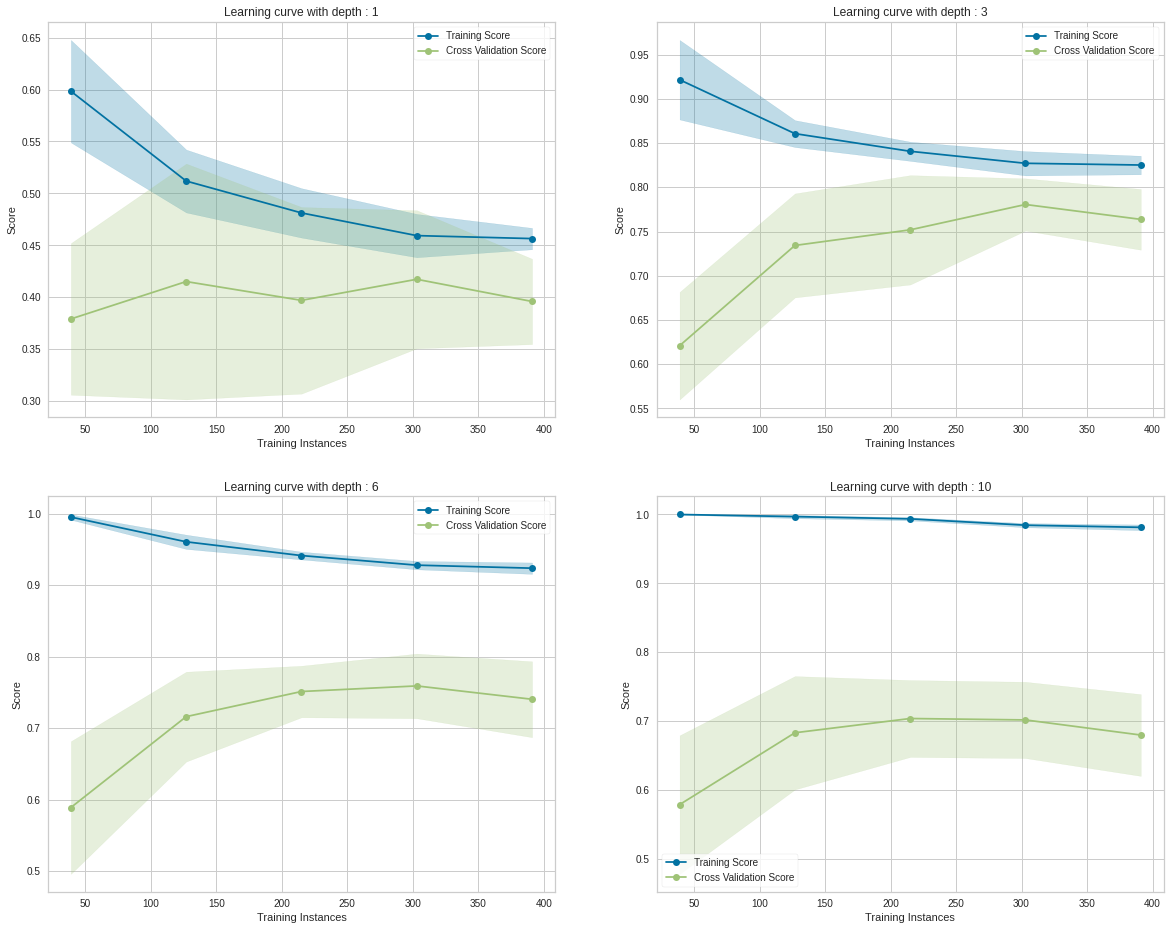

In [ ]:
for k,depth in enumerate([1,3,6,10]):
  fig = plt.gcf()
  fig.set_size_inches(20,16)
  ax = plt.subplot(2,2,k+1)

  model = DecisionTreeRegressor(max_depth=depth)

  visualizer = LearningCurve(model, scoring='r2', cv=ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0),
                           ax = ax)
  visualizer.fit(features, prices)
  visualizer.finalize()

  visualizer.set_title(f'Learning curve with depth : {depth}')

**Intuitions**

1. Max_depth = 1(High Bias Scenario)
  * We can see the testing score (green line) increases slightly with the number of observations
  * However, the testing score only increases to approximately 0.425 which low. This indicates how the model does not generalize well for new, unseen, data.
  * Moreover, the training score (blue line) decreases with the number of observations. Also, the trainings score decreases to a very low score of approximatey 0.45 (the fall should be minimum). This indicates how the model does not seem to fit the data well.
  * Thus, we can say this model is facing a high bias problem. Consequently, having more training points would not benefit the model as the model is underfitting the dataset. Instead, **one should increase the model complexity to better fit the dataset**.
  * Moreover the testing score has reached almost flat line suggesting the model may not improve from adding more training points.

2. Max_depth = 3 (Ideal Scenario)
  * Testing score (green line) increases with training points
    * Reaches ~ 0.8
    * High score
    * Generalize well
  * Training score (blue line) decreases sligtly with training points
    * Reaches ~ 0.8
    * High score
    * Fit dataset well
  * There seems to be no high bias or high variance problem
    * Model fits and generalizes well
    * Ideal
    * More training points should help it become as even more ideal model.
3. Max_depth = 6 (Slightly High Variance Scenario)
  * Testing score (green line) increases with training points
    * Reaches ~ 0.78
    * Not so high score
    * Does not generalize well, as the distance b/w two curves is more.
  * Training score (blue line) decreases slightly with training points
    * At ~ 0.92
    * High score
    * Overfitting dataset as test score is far less compared to train score.
  * There seems to be high variance problem (test score is not as close to train)
    * Overfitting
    * More training points might help as curves are not converging.
    * This is getting close to ideal scenario
4. Mac_depth = 10 (High variance scenario)
  * Testing score (green line) increases with training points
    * Reaches ~ 0.7
    * Not so high score
    * Does not generalize well
  * Training score (blue line) barely decreases with training points
    * At ~ 1.0 and becomes as low as 0.98
    * Almost perfect score
    * Overfitting dataset
  * There seems to be high variance problem
    * Overfitting

**<h2>Validation Curve**

* Model validation is used to determine 'how effective an estimator is on data that it has been trained on' as well as 'how generalizable it is to new input'.
* To measure a model's performance we first split the dataset into training and test splits.
* Then fitting the model on that training data and scoring it on the reserved test data.
* In order to maximize the score, need to the optimum hyperparameter.
* Most models have multiple hyperparameters and use grid search to choose best one.
* However, it is useful to plot the influence of a single hyperparameter on the training and test data to determine if th estimator is **underfitting** or **overfitting** for some hyperparameter values.
* Validation curve is like error curve which we plot for each hyper parameter value on training and testing data set.
* Note that if we optimize the hyperparameters based on validation score, the validation score is biased (trying to achive the perfectness - overfitting) and not a good estimate of the generalization any longer.
* To get a proper estimate of the generalization we have to compute the score on another test set.

In [ ]:
from yellowbrick.model_selection import ValidationCurve

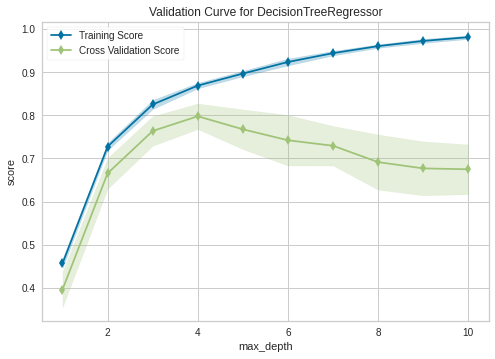

In [ ]:
model = DecisionTreeRegressor()
visualizer = ValidationCurve(model, param_name='max_depth',
                             param_range=np.arange(1,11),
                             cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0),
                             scoring='r2')
visualizer.fit(features, prices)
visualizer.finalize()

**<h2> Bias-Variance Tradeoff**

* It is easy to identify whether the model is suffering from a **high bias** or **high variance**.
  * High variance models have a gap between the training and validation scores.
  * This is because it is able to fit the model well but unable to generalize well resulting in high training score but low validation score.
  * High bias models has small or no hap between the training and validation scores.
  * This is because it is unable to fit the model well and unable to generalize well resulting in both scores converging to a similar low score

* Maximum depth of 1 : High Bias
  * Both training and testing scores are low.
  * There is barely a gap between the training and testing scores.
  * This indicates the model is not fitting the dataset well and not generalizing well hence the model is suffering from high bias.

* Maximum depth of 10: High Variance
  * Training score is high. Testing score is low.
  * There is substantial gap between the training and testing scores.
  * This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance.